<a href="https://colab.research.google.com/github/ahmedhisham73/deep_learningtuts/blob/master/deeplearningtutorialCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images / 255.0
test_images=test_images / 255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)

test_loss = model.evaluate(test_images, test_labels)

W0825 13:00:08.922802 140371948574592 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5002 - acc: 0.8222
Epoch 2/10
60000/60000 [==============================] - 4s 58us/sample - loss: 0.3754 - acc: 0.8648
Epoch 3/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3376 - acc: 0.8774
Epoch 4/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3134 - acc: 0.8851
Epoch 5/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2936 - acc: 0.8918
Epoch 6/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2789 - acc: 0.8966
Epoch 7/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2658 - acc: 0.9020
Epoch 8/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2564 - acc: 0.9053
Epoch 9/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2455 - acc: 0.9082
Epoch 10/10
10000/10000 [==============================] - 0s 41us/sample - loss: 

In [2]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=10)
test_loss = model.evaluate(test_images, test_labels)


1.14.0
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_3 (Dense)              (None, 10)        

now lets see the journey of the image during the whole training process

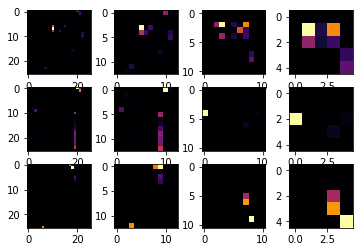

In [3]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=1
SECOND_IMAGE=19
THIRD_IMAGE=29
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

trying to improve the accuracy

In [4]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

1.14.0
Epoch 1/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.1613 - acc: 0.9517
Epoch 2/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0533 - acc: 0.9837
Epoch 3/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0374 - acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.0285 - acc: 0.9912
Epoch 5/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0225 - acc: 0.9926
Epoch 6/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.0175 - acc: 0.9943
Epoch 7/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.0146 - acc: 0.9951
Epoch 8/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0130 - acc: 0.9959
Epoch 9/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0110 - acc: 0.9962
Epoch 10/10
10000/10000 [==============================] - 1s 51us/sample -